# 📊 Análisis de Churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 📂 Lectura desde CSV

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/christanov/telco-churn-project/main/data/telco_dataset_final.csv")
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService',
            'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection']
X = df[features].copy()
y = df['Churn']

for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train[X.columns] = scaler.fit_transform(X_train[X.columns])
X_test[X.columns] = scaler.transform(X_test[X.columns])

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1036
         Yes       0.63      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



## 📊 4.1 Visualizaciones Generadas

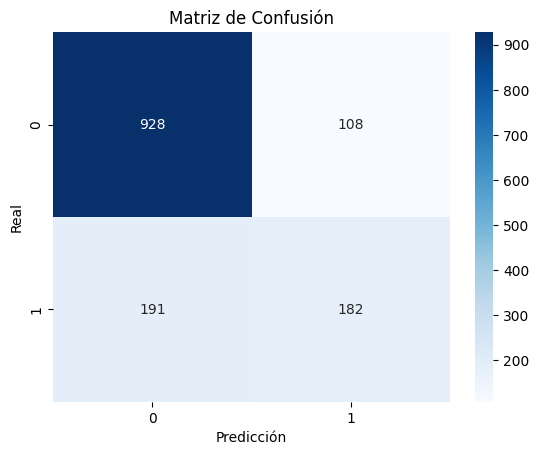

In [3]:
# Matriz de Confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

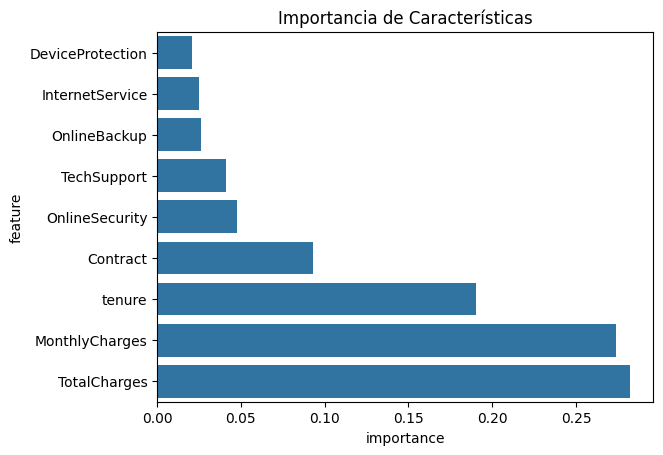

In [4]:
# Importancia de Características
importancia = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
sns.barplot(x='importance', y='feature', data=importancia.sort_values('importance', ascending=True))
plt.title("Importancia de Características")
plt.show()

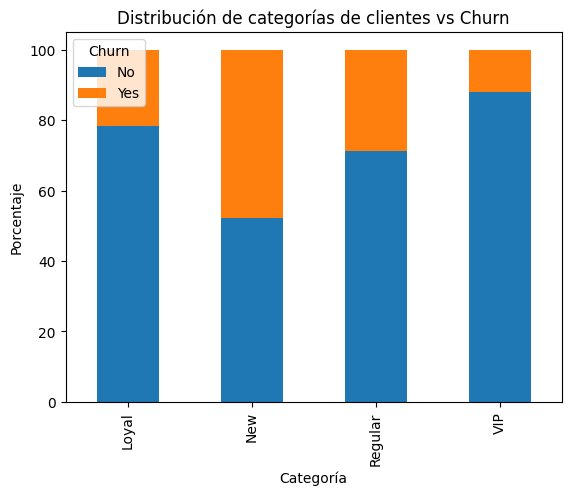

In [5]:
# Distribución de categorías vs Churn
cross = pd.crosstab(df['CustomerCategory'], df['Churn'], normalize='index') * 100
cross.plot(kind='bar', stacked=True)
plt.title("Distribución de categorías de clientes vs Churn")
plt.xlabel("Categoría")
plt.ylabel("Porcentaje")
plt.legend(title="Churn")
plt.show()

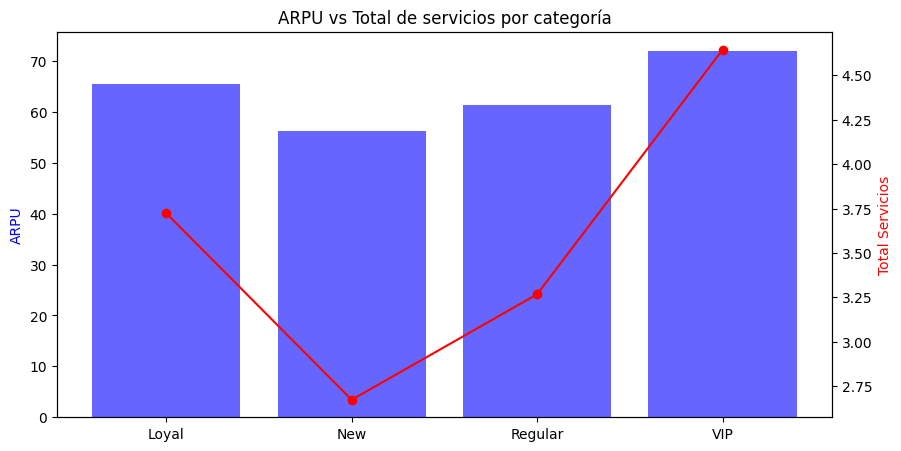

In [6]:
# ARPU vs Total de servicios por categoría
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

avg_arpu = df.groupby('CustomerCategory')['ARPU'].mean()
avg_services = df.groupby('CustomerCategory')['TotalServices'].mean()

ax1.bar(avg_arpu.index, avg_arpu.values, alpha=0.6, color='blue', label='ARPU')
ax2.plot(avg_services.index, avg_services.values, color='red', marker='o', label='Servicios')

ax1.set_ylabel("ARPU", color='blue')
ax2.set_ylabel("Total Servicios", color='red')
plt.title("ARPU vs Total de servicios por categoría")
plt.show()